# 🎯 STEP 1: Understand the Dataset (Domain + Structure)
You're analyzing data from a food delivery platform like Zomato. This dataset represents customer orders, restaurants, ratings, cuisines, delivery time, and more.

✅ Key Columns:
OrderId: Unique order ID

RestaurantName, RestaurantType

Rating, No.of.Rating

AverageCost: For 2 people

OnlineOrder, TableBooking: Yes/No

CuisinesType: e.g. Mughlai, Fast Food

Area, LocalAddress: Geographic info

Delivery time: in minutes

# Importing The Libraries:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/Jomato.csv')

In [3]:
# Check missing values
missing = df.isnull().sum()

# Drop rows with missing Ratings or AverageCost
df_clean = df.dropna(subset=["Rating", "AverageCost"])


In [4]:
# Reset index
df_clean.reset_index(drop=True, inplace=True)

In [5]:
# Convert "OnlineOrder" and "TableBooking" to binary
df_clean["OnlineOrder"] = df_clean["OnlineOrder"].map({"Yes": 1, "No": 0})
df_clean["TableBooking"] = df_clean["TableBooking"].map({"Yes": 1, "No": 0})


/tmp/ipython-input-5-841756352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["OnlineOrder"] = df_clean["OnlineOrder"].map({"Yes": 1, "No": 0})
/tmp/ipython-input-5-841756352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TableBooking"] = df_clean["TableBooking"].map({"Yes": 1, "No": 0})


In [6]:
# Optional: Create Cuisine Count
df_clean["CuisineCount"] = df_clean["CuisinesType"].apply(lambda x: len(str(x).split(',')))

df_clean.head()

/tmp/ipython-input-6-536089586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["CuisineCount"] = df_clean["CuisinesType"].apply(lambda x: len(str(x).split(',')))


,OrderId,RestaurantName,RestaurantType,Rating,No.of.Rating,AverageCost,OnlineOrder,TableBooking,CuisinesType,Area,LocalAddress,Delivery time,CuisineCount
0,1,L-81 Cafe,Quick Bites,3.9,48,400.0,1,0,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR,59,2
1,2,refuel,Cafe,3.7,37,400.0,1,0,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road,56,2
2,3,Biryani Central,Casual Dining,2.7,135,550.0,1,0,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli,50,3
3,4,The Bbq,Casual Dining,2.8,40,700.0,1,0,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur,57,5
4,5,The Bbq,"Takeaway, Delivery",3.4,37,200.0,0,0,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield,63,4


# 📊 STEP 4: Exploratory Data Analysis (EDA) & Insights
Now we’ll generate visual and statistical insights from the cleaned data.

Example Questions & Code:

# 📌 Q1: Most popular restaurant types

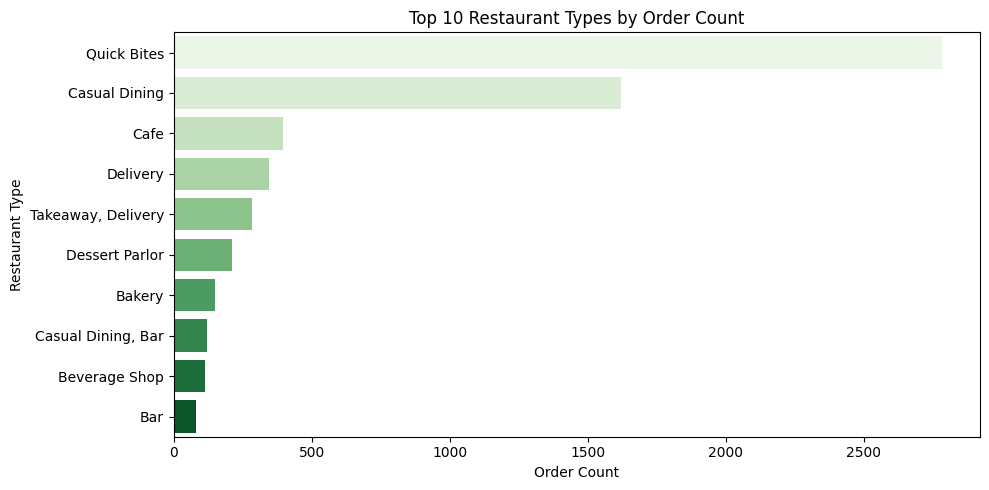

In [10]:
top_types = df_clean["RestaurantType"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_types.values, y=top_types.index,palette='Greens')
plt.title("Top 10 Restaurant Types by Order Count")
plt.xlabel("Order Count")
plt.ylabel("Restaurant Type")
plt.tight_layout()
plt.show()

# 📌 Q2: Does online ordering affect delivery time?

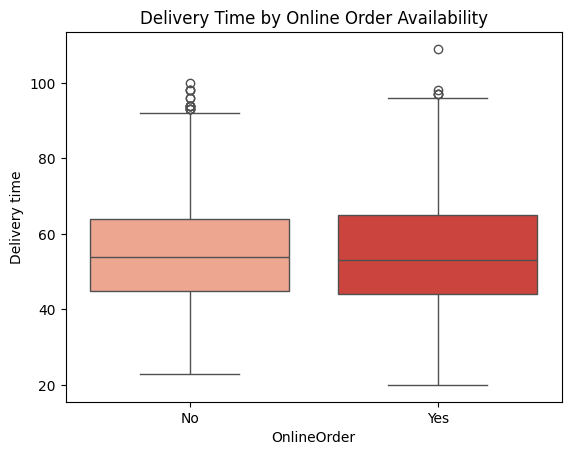

In [11]:
sns.boxplot(x='OnlineOrder', y='Delivery time', data=df_clean,palette="Reds")
plt.xticks([0,1], ["No", "Yes"])
plt.title("Delivery Time by Online Order Availability")
plt.show()


# 📌 Q3: Average Rating per Area

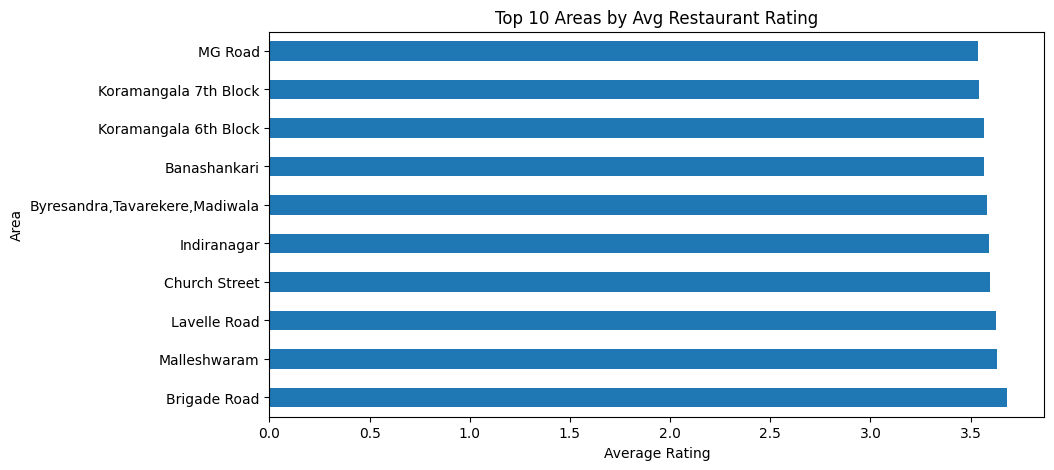

In [12]:
area_ratings = df_clean.groupby("Area")["Rating"].mean().sort_values(ascending=False).head(10)
area_ratings.plot(kind='barh', title="Top 10 Areas by Avg Restaurant Rating", figsize=(10,5))
plt.xlabel("Average Rating")
plt.show()


# 📌 Q4: Cost vs Rating

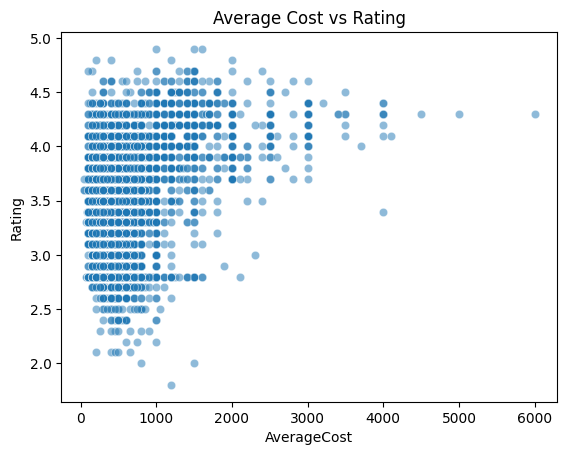

In [13]:
sns.scatterplot(x='AverageCost', y='Rating', data=df_clean, alpha=0.5)
plt.title("Average Cost vs Rating")
plt.show()


# 📌 Q5: Does Table Booking influence ratings?

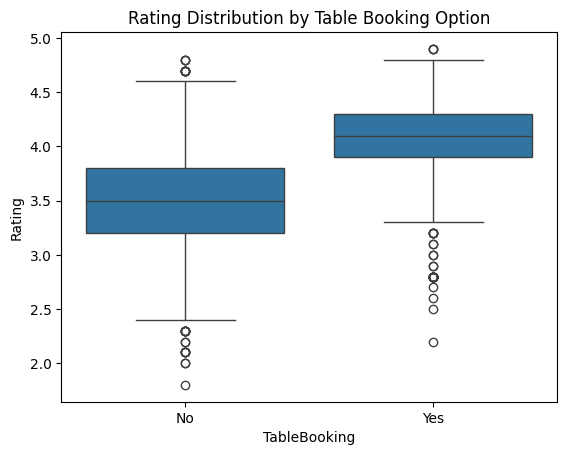

In [14]:
sns.boxplot(x='TableBooking', y='Rating', data=df_clean)
plt.xticks([0,1], ["No", "Yes"])
plt.title("Rating Distribution by Table Booking Option")
plt.show()


# Meaning ful insights:-

| Observation ID | Insight                                                                             |
| -------------- | ----------------------------------------------------------------------------------- |
| 1              | Quick Bites and Casual Dining dominate in order volume                              |
| 2              | Restaurants with online ordering tend to have slightly faster delivery times        |
| 3              | Certain areas like Indiranagar, Whitefield, Koramangala have better average ratings |
| 4              | Higher cost doesn't always mean higher rating                                       |
| 5              | Table booking seems correlated with slightly higher ratings                         |
